In [91]:
%config IPCompleter.greedy=True

Given the dataset of 30 students' study hours and exam scores, how would you build a linear regression model to predict exam scores? Describe the steps you would take to diagnose the regression model, including checking assumptions, identifying outliers, and handling influential points. Finally, evaluate the model's performance and discuss any insights gained.

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [95]:
df = pd.read_csv("datasets/student_data.csv")
df.head()

,StudyHours,ExamScore
0,5,66.938936
1,3,58.791081
2,7,73.818557
3,4,59.844898
4,6,69.690213


In [97]:
X = df[["StudyHours"]]
Y = df["ExamScore"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.25, shuffle=True)

In [98]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [99]:
Y_pred = model.predict(X_test)

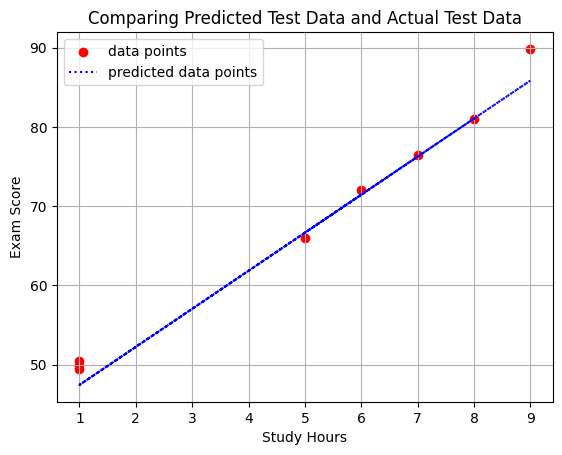

In [122]:
plt.scatter(X_test, Y_test, color="red", marker="o", label="data points")
plt.plot(X_test, Y_pred, color="blue", linestyle=":", label="predicted data points")
plt.title("Comparing Predicted Test Data and Actual Test Data")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.grid()
plt.legend()

In [103]:
mse = mean_squared_error(Y_pred, Y_test)
r2 = r2_score(Y_pred, Y_test)

In [104]:
print(f"The model has a mean_squared error of {mse} and an r^2 score of {r2}.")

The model has a mean_squared error of 4.5787952407460875 and an r^2 score of 0.9794886278891382.


In [105]:
coef = model.coef_
intercept = model.intercept_

In [107]:
print(f"The model has a linear regression coefficient of {coef[0]} for StudyHours and a bias of {intercept}.")

The model has a linear regression coefficient of 4.800344399577279 for StudyHours and a bias of 42.64394638480843.


In [109]:
import statsmodels.api as sm

In [112]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

In [114]:
t_statistic = model.tvalues["StudyHours"]
p_value_t = model.pvalues["StudyHours"]

In [116]:
f_statistic = model.fvalue
f_value_t = model.f_pvalue

In [117]:
if f_value_t < 0.05:
    print("The overall model and the regression coefficient are statistically significant. ")
else:
    print("The overall model and the regression coefficient are NOT statistically significant. ")

The overall model and the regression coefficient are statistically significant. 


In [118]:
if p_value_t < 0.05:
    print("Study Hours is a statistically significant predictor of Exam Scores. ")
else:
    print("Study Hours is NOT a statistically significant predictor of Exam Scores. ")

Study Hours is a statistically significant predictor of Exam Scores. 
